In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

/tmp/ipykernel_75745/1957209273.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = df['Dt (μs)'].cumsum()
/tmp/ipykernel_75745/1957209273.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Normalized Timestamp'] = df['Timestamp'] / df['Timestamp'].iloc[-1]
/tmp/ipykernel_75745/1957209273.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

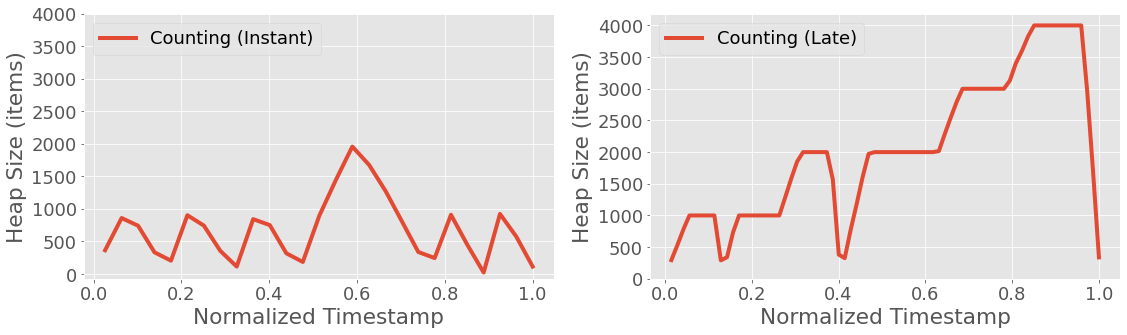

In [5]:
PATH = '../Logs/instant_vs_late_test/'
filenames = [
    'instant_vs_late_test_Counting_Instant_BFS.csv', 
    'instant_vs_late_test_Counting_Late_BFS.csv'
]
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(16, 5), facecolor='white')
gs = fig.add_gridspec(1,2)
data = [pd.read_csv(PATH + filename) for filename in filenames]
ax = None
i = 0

for df, label in zip(data, ['Counting (Instant)', 'Counting (Late)']):
    ax = fig.add_subplot(gs[:, i])
    i += 1
    df = df[df['HeapSize (items)'] > 0]
    df['Timestamp'] = df['Dt (μs)'].cumsum()
    df['Normalized Timestamp'] = df['Timestamp'] / df['Timestamp'].iloc[-1]
    ax = df.plot(x='Normalized Timestamp', y='HeapSize (items)',
                 ax=ax, label=label, linewidth=4, fontsize=18, yticks=np.arange(0, 4000+1, 500))
    plt.ylabel('Heap Size (items)')
    plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('../Plots/instant_vs_late_test.png')
plt.show()